# Install dependencies

In [468]:
#@title Setup
from google.colab import drive
drive.mount('/content/drive/')

!pip3 install gym-minigrid
!pip install tensorboardX
!pip install -U matplotlib
!pip3 install torch torchvision

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.3)


# Create delayed decision task

This project's goal is to model human memory during a delayed decision task. To mimic the time delay for humans, the delay frame for each episode will be object-less.

In [ ]:
#@title Delayed Decision Task in Array (Not Used)
import numpy as np
import random

# grid room for computer: array
## an object with random [shape, size, color]
# robj = np.random.randint(0, 3, 3)

# create empty room: a 4 by 4 grid with no object
# will be used as empty delay frame
blank = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

## a random col + a random row in the room
# tile = random.choice(random.choice(blank))

# cue frame: a room with one random object
robj_1 = np.random.randint(0, 3, 3) # object 1 in cue

cue_shape = robj_1[0] # cue object's shape

row = random.randint(0, 3)
col = random.randint(0, 3)
blank[row][col] = robj_1
cue = blank # cue frame

# reset blank
blank = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

# test frame: a room with two random objects
robj_2 = np.random.randint(0, 3, 3) # object 1 in test
robj_2[0] = cue_shape # same shape as cue object
row = random.randint(0, 3)
col = random.randint(0, 3)
blank[row][col] = robj_2

robj_3 = np.random.randint(0, 3, 3) # object 2 in test
if robj_3[0] != cue_shape: # different shape from cue object
    row = random.randint(0, 3)
    col = random.randint(0, 3)
    blank[row][col] = robj_3
    test = blank # test frame

# empty delay frame
delay = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

# expected CNN output: [shape,shape,shape]

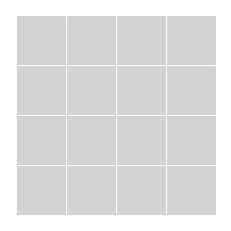

In [96]:
#@title Delayed Decision Task: Delay Frame in Matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

test = plt.gca()
test.add_patch(tile_1)
test.add_patch(tile_2)
test.add_patch(tile_3)
test.add_patch(tile_4)
test.add_patch(tile_5)
test.add_patch(tile_6)
test.add_patch(tile_7)
test.add_patch(tile_8)
test.add_patch(tile_9)
test.add_patch(tile_10)
test.add_patch(tile_11)
test.add_patch(tile_12)
test.add_patch(tile_13)
test.add_patch(tile_14)
test.add_patch(tile_15)
test.add_patch(tile_16)

plt.axis('scaled')
plt.axis('off')
plt.show()

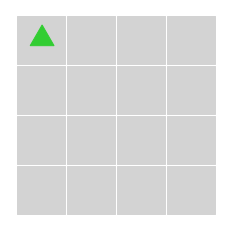

In [465]:
#@title Delayed Decision Task: Cue Frame in Matplotlib

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

# list of object position
square_x = [1.5, 3.5, 5.5, 7.5]
square_y = [1.5, 3.5, 5.5, 7.5]
triangle_x = [2, 4, 6, 8]
triangle_y = [2, 4, 6, 8]
circle_x = [2, 4, 6, 8]
circle_y = [2, 4, 6, 8]

# list of object color
colors = ['tomato', 'limegreen', 'lightskyblue']

# randomize sqaure's height and weight
square_len = random.uniform(0.3, 1)

# object with random radius
square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))

cue = plt.gca()
cue.add_patch(tile_1)
cue.add_patch(tile_2)
cue.add_patch(tile_3)
cue.add_patch(tile_4)
cue.add_patch(tile_5)
cue.add_patch(tile_6)
cue.add_patch(tile_7)
cue.add_patch(tile_8)
cue.add_patch(tile_9)
cue.add_patch(tile_10)
cue.add_patch(tile_11)
cue.add_patch(tile_12)
cue.add_patch(tile_13)
cue.add_patch(tile_14)
cue.add_patch(tile_15)
cue.add_patch(tile_16)

# randomly select one object
cue_objects = [square, circle, triangle]
cue_object = random.choice(cue_objects)

cue.add_patch(cue_object)

plt.axis('scaled')
plt.axis('off')
plt.show()

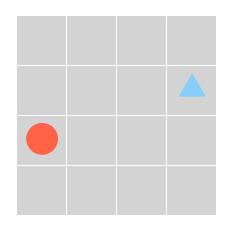

In [471]:
#@title Delayed Decision Task: Test Frame in Matplotlib

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

# list of object position
square_x = [1.5, 3.5, 5.5, 7.5]
square_y = [1.5, 3.5, 5.5, 7.5]
triangle_x = [2, 4, 6, 8]
triangle_y = [2, 4, 6, 8]
circle_x = [2, 4, 6, 8]
circle_y = [2, 4, 6, 8]

# list of object color
colors = ['tomato', 'limegreen', 'lightskyblue']

# randomize sqaure's height and weight
square_len = random.uniform(0.3, 1)

# object with random radius
square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))

test = plt.gca()
test.add_patch(tile_1)
test.add_patch(tile_2)
test.add_patch(tile_3)
test.add_patch(tile_4)
test.add_patch(tile_5)
test.add_patch(tile_6)
test.add_patch(tile_7)
test.add_patch(tile_8)
test.add_patch(tile_9)
test.add_patch(tile_10)
test.add_patch(tile_11)
test.add_patch(tile_12)
test.add_patch(tile_13)
test.add_patch(tile_14)
test.add_patch(tile_15)
test.add_patch(tile_16)

# randomly select two object
while True:
  square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
  triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
  circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))
  test_objects = [square, circle, triangle]
  t_objects = random.sample(test_objects, 2)
  if type(t_objects[0]) == type(cue_object) or type(t_objects[1]) == type(cue_object) and type(t_objects[0]) != type(t_objects[1]): # if one and only one testing object match with cue object
    for index, obj in enumerate(t_objects):
      test.add_patch(t_objects[index])
    break

plt.axis('scaled')
plt.axis('off')
plt.show()

# Define neural network model

In [ ]:
#cue

#delay

random.random_integers(1,10) #max length: 10
random.random_integers(1,20) #max length: 20
random.random_integers(1,30) #max length: 30

#test

In [ ]:
import random

random.seed(10)
print(random.random())

random.seed(10)
print(random.random())

0.5714025946899135
0.5714025946899135


In [ ]:
# training
# idx_to_object 
0 = circle
1 = square
2 = triangle

# CNN output [circle, square, triangle]
if circle [1, 0, 0]
if square [0, 1, 0]
if triangle [0, 0, 1]

1 + n frame

In [472]:
import pandas as pd
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")
import os

dir = os.listdir('/content/drive/My Drive/MiniGrid/Train')

for image in dir:
  path = "/content/drive/My Drive/MiniGrid/Train" + image
  image_cv = cv2.imread(path)
  image_array = np.array(image_cv)
  np.append(image_array)

TypeError: ignored

Code adapted from https://github.com/lcswillems/rl-starter-files/blob/master/model.py

In [ ]:
import torch
import torch.nn as nn

# define NN model

class model(nn.Module):
    def __init__(self):
        
        # define image embedding: (conv+relu+maxpool)*3
        # array: 4*4*3 = 48
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, (2, 2)), # conv-1
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(16, 32, (2, 2)), # conv-2
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(32, 64, (2, 2)), # conv-3
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Flatten(), # connect CNN output with LSTM for each frame
            nn.LSTM(),
            nn.Flatten(), # connect LSTM output with loss function for each frame
            nn.CrossEntropyLoss
        )
        n = obs_space["image"][0]
        m = obs_space["image"][1]
        self.image_embedding_size = ((n-1)//2-2)*((m-1)//2-2)*64
        

        # Connect CNN output with LSTM for each frame
        self.lstm = nn.LSTMCell(self.image_embedding_size, self.semi_memory_size)
        
        # Flatten LSTM output
        flatten = torch.flatten(self.lstm)

        # Loss function
        target = #prob = 1
        output = nn.CrossEntropyLoss(flatten, #target eg., int 10#)

SyntaxError: ignored

#Testing

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
print(target)
output = loss(input, target)
print(output)
output.backward()

tensor([2, 1, 1])
tensor(1.6694, grad_fn=<NllLossBackward>)


In [ ]:
!git clone https://github.com/lcswillems/rl-starter-files.git

fatal: destination path 'rl-starter-files' already exists and is not an empty directory.


In [ ]:
%cd rl-starter-files

/content/rl-starter-files


In [ ]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 317kB 7.3MB/s 


In [ ]:
!python3 -m scripts.train --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 10

/content/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 10

Namespace(algo='ppo', batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-Empty-6x6-v0', epochs=4, frames=10, frames_per_proc=None, gae_lambda=0.95, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='Memory', optim_alpha=0.99, optim_eps=1e-08, procs=16, recurrence=1, save_interval=10, seed=1, text=False, value_loss_coef=0.5)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (6): ReLU()
  )
  (actor): Sequential(
    (0): Linear(in

In [ ]:
!python3 -m scripts.train --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 20

/content/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 20

Namespace(algo='ppo', batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-Empty-6x6-v0', epochs=4, frames=20, frames_per_proc=None, gae_lambda=0.95, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='Memory', optim_alpha=0.99, optim_eps=1e-08, procs=16, recurrence=1, save_interval=10, seed=1, text=False, value_loss_coef=0.5)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (6): ReLU()
  )
  (actor): Sequential(
    (0): Linear(in

In [ ]:
!python3 -m scripts.train --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 30

/content/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Empty-6x6-v0 --model Memory --save-interval 10 --frames 30

Namespace(algo='ppo', batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-Empty-6x6-v0', epochs=4, frames=30, frames_per_proc=None, gae_lambda=0.95, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='Memory', optim_alpha=0.99, optim_eps=1e-08, procs=16, recurrence=1, save_interval=10, seed=1, text=False, value_loss_coef=0.5)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (6): ReLU()
  )
  (actor): Sequential(
    (0): Linear(in

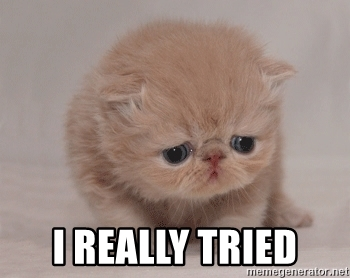